In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st 

In [2]:
def uniform11(n):
    return np.random.uniform(-1, 1, n) 

def normal_dist(n):
    return np.random.normal(0, 1, n) 

## JACKKNIFE SECTION:

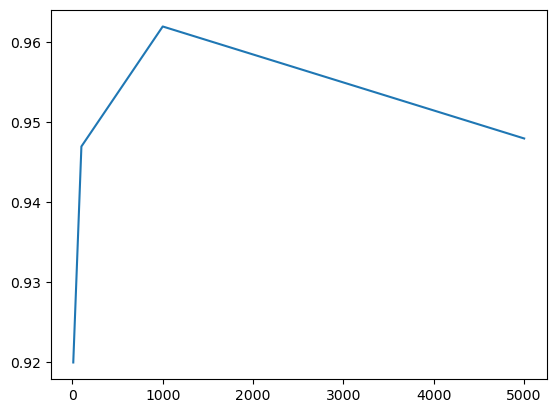

In [4]:
n_s = [10, 100, 1000, 5000]
res = []

for n in n_s:
    success = 0
    for _ in range(1000):
        original_sample = normal_dist(n)
        c = np.mean(original_sample)

        c_s = []
        for i in range(n):
            c_s.append(np.mean(np.concatenate((original_sample[:i], original_sample[i+1:]))))
        c_s = np.array(c_s)
        c_jack = np.mean(c_s)
        
        variance = (n - 1) * np.mean(np.square(c_s - c_jack))
        
        left = c - np.sqrt(variance) * st.norm.ppf(q=0.975)
        right = c + np.sqrt(variance) * st.norm.ppf(q=0.975)
        if left < 0 and right > 0:
            success += 1

    res.append(success/1000)

plt.plot(n_s, res)
plt.show()

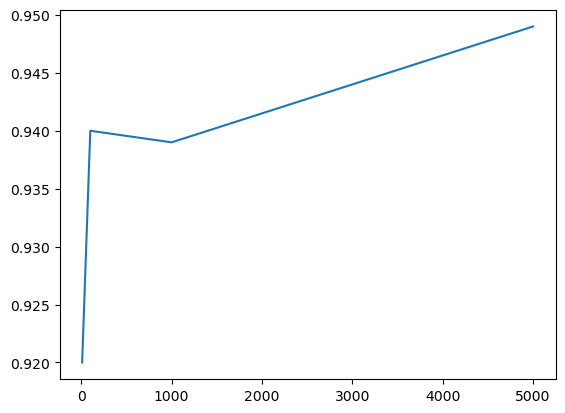

In [5]:
n_s = [10, 100, 1000, 5000]
res = []

for n in n_s:
    success = 0
    for _ in range(1000):
        original_sample = uniform11(n)
        c = np.mean(original_sample)

        c_s = []
        for i in range(n):
            c_s.append(np.mean(np.concatenate((original_sample[:i], original_sample[i+1:]))))
        c_s = np.array(c_s)
        c_jack = np.mean(c_s)
        
        variance = (n - 1) * np.mean(np.square(c_s - c_jack))
        
        left = c - np.sqrt(variance) * st.norm.ppf(q=0.975)
        right = c + np.sqrt(variance) * st.norm.ppf(q=0.975)
        if left < 0 and right > 0:
            success += 1

    res.append(success/1000)

plt.plot(n_s, res)
plt.show()

## BOOTSTRAP SECTION:

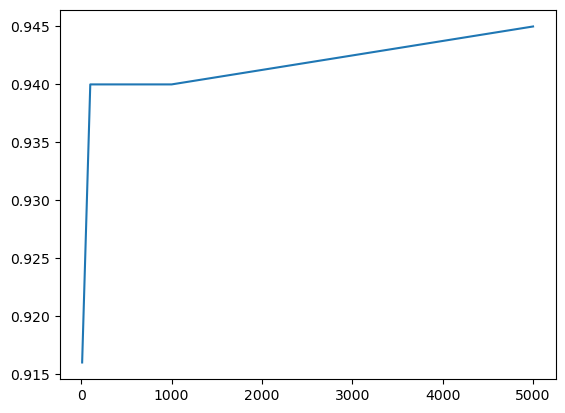

In [6]:
n_s = [10, 100, 1000, 5000]
res = []

for n in n_s:
    success = 0
    for _ in range(1000):
        original_sample = normal_dist(n)
        
        c_s = []
        for i in range(1000):
            c_s.append(np.mean(np.random.choice(original_sample, size=n, replace=True)))
        c_s = np.sort(np.array(c_s))
        
        left = np.percentile(c_s, 2.5)
        right = np.percentile(c_s, 97.5)
        if left < 0 and right > 0:
            success += 1

    res.append(success/1000)

plt.plot(n_s, res)
plt.show()

In [ ]:
n_s = [10, 100, 1000, 5000]
res = []

for n in n_s:
    success = 0
    for _ in range(1000):
        original_sample = uniform11(n)
        
        c_s = []
        for i in range(1000):
            c_s.append(np.mean(np.random.choice(original_sample, size=n, replace=True)))
        c_s = np.sort(np.array(c_s))
        
        left = np.percentile(c_s, 2.5)
        right = np.percentile(c_s, 97.5)
        if left < 0 and right > 0:
            success += 1

    res.append(success/1000)

plt.plot(n_s, res)
plt.show()